# 대장암 KM 곡선 (2X2)

In [3]:
import pandas as pd
df = pd.read_csv('../tx_changed_data/origin_colon_cancer.csv')
tx_cols = [col for col in df.columns if col.startswith('tx_')]
print(tx_cols)

['tx_00000', 'tx_00100', 'tx_01000', 'tx_10000', 'tx_10100', 'tx_01100', 'tx_11000', 'tx_11100']


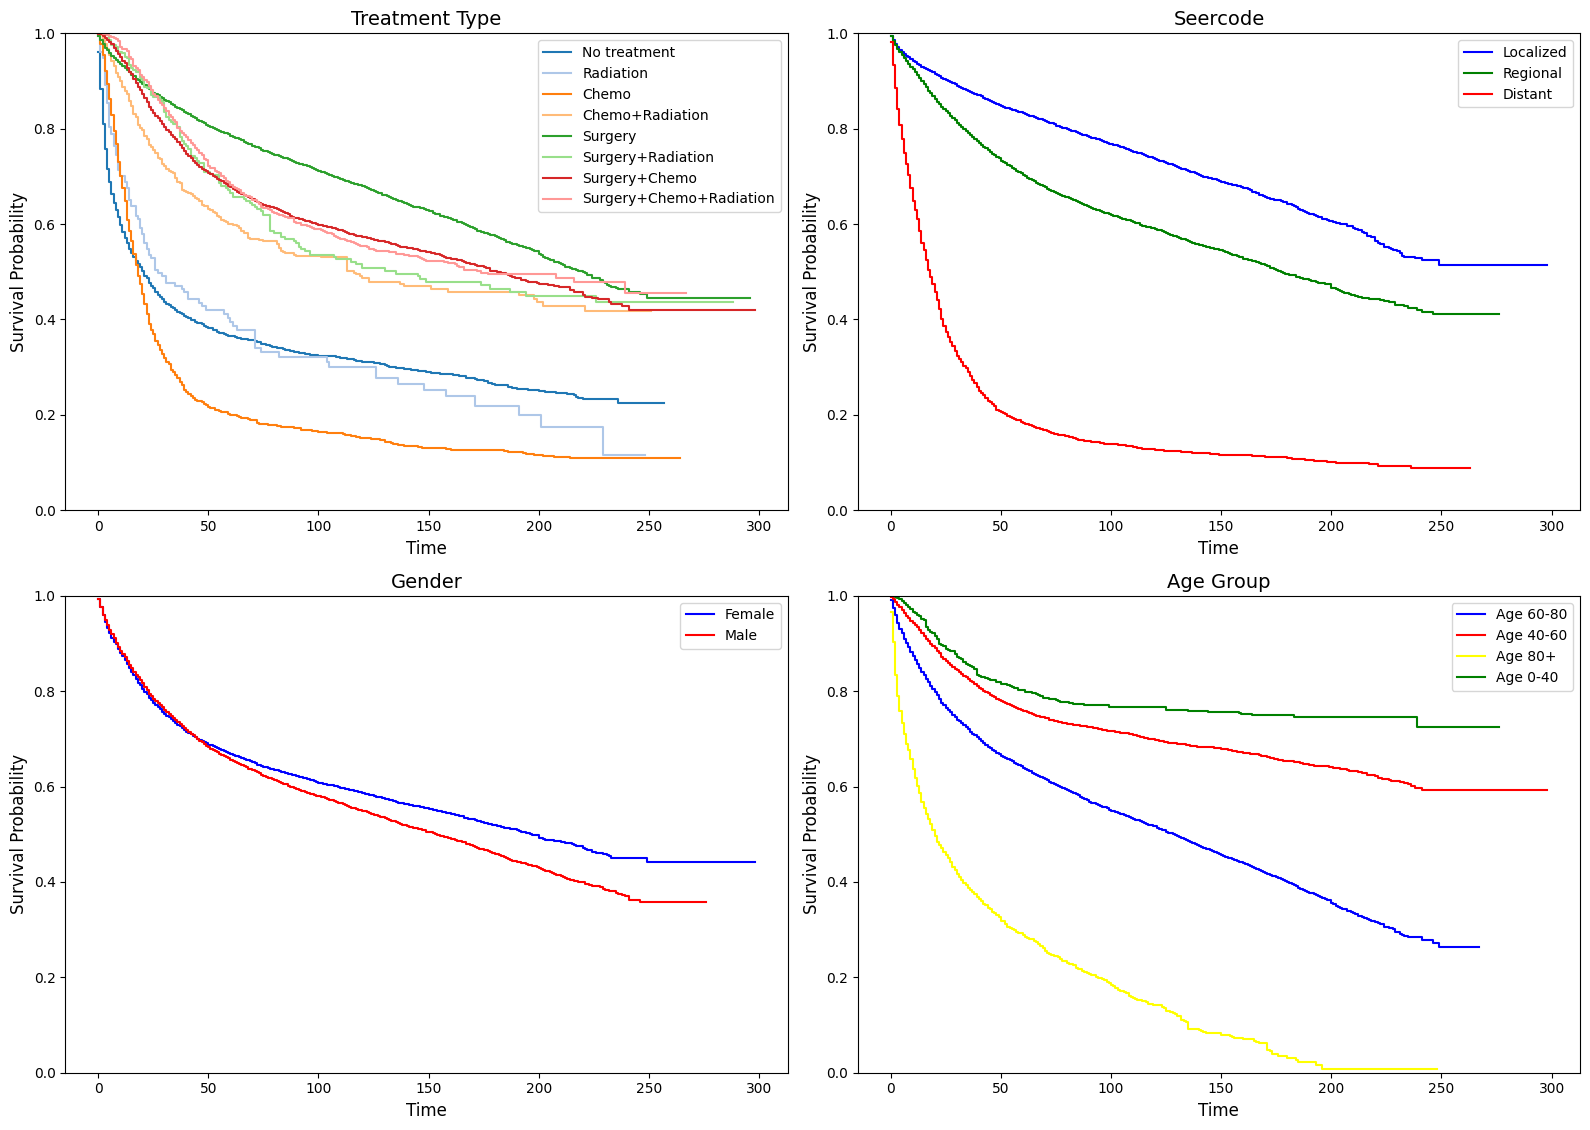

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
from lifelines import KaplanMeierFitter
from sklearn.preprocessing import StandardScaler
import numpy as np

# 데이터 로드
df = pd.read_csv('../tx_changed_data/colon_cancer.csv')

# KaplanMeierFitter 객체 생성
kmf = KaplanMeierFitter()

# 서브플롯을 2행 2열로 설정
fig, axes = plt.subplots(2, 2, figsize=(16, 12))
axes = axes.flatten()  # 2차원 배열을 1차원으로 변환

# Kaplan-Meier 곡선을 그리는 함수 정의
def plot_kmf(ax, groups, df, time_col, event_col, title, colors):
    for i, (group, condition) in enumerate(groups.items()):
        kmf.fit(df[condition][time_col], df[condition][event_col], label=group)
        kmf.plot(ax=ax, ci_show=False, color=colors[i % len(colors)])
    ax.set_title(title, fontsize=14)
    ax.set_xlabel('Time', fontsize=12)
    ax.set_ylabel('Survival Probability', fontsize=12)
    ax.set_ylim(0, 1)

#['tx_00000', 'tx_00100', 'tx_01000', 'tx_01100', 'tx_10000', 'tx_10010', 'tx_10100', 'tx_11000', 'tx_11010', 'tx_11100']
# 1. Treatment Type
ax = axes[0]
treatments = {
    'No treatment': (df['tx_00000'] == 1),
    'Radiation': df['tx_00100'] == 1,
    'Chemo': df['tx_01000'] == 1,
    'Chemo+Radiation': df['tx_01100'] == 1,
    'Surgery': df['tx_10000'] == 1,
    'Surgery+Radiation': df['tx_10100'] == 1,
    'Surgery+Chemo': df['tx_11000'] == 1,
    'Surgery+Chemo+Radiation': df['tx_11100']==1
    }
colors = plt.cm.tab20.colors
plot_kmf(ax, treatments, df, 'stime', 'event_inc', 'Treatment Type', colors)
ax.legend(fontsize=10, loc='best')   # ← 여기서만 글자 크기 조정

# 2. Metastasis
ax = axes[1]
metastasis_groups = {
    'Localized': df['Localized'] == 1,
    'Regional': df['Regional'] == 1,
    'Distant': df['Distant'] == 1
}
colors = ['blue', 'green', 'red']
plot_kmf(ax, metastasis_groups, df, 'stime', 'event_inc', 'Seercode', colors)

# 3. Gender
ax = axes[2]
gender_groups = {
    'Female': df['sex'] == 0,
    'Male': df['sex'] == 1
}
colors = ['blue', 'red']
plot_kmf(ax, gender_groups, df, 'stime', 'event_inc', 'Gender', colors)

# 4. Age Group
# age_scaled → 원래 값으로 역변환
original_mean = 60
original_std = 15
df['age_unscaled'] = (df['age_scaled'] * original_std) + original_mean

# 4. Age Group
# age_scaled → 역변환 대신, 원래 df에 있는 'age' 변수 사용
df['age_group'] = pd.cut(df['age'], 
                         bins=[0, 40, 60, 80, float('inf')],
                         labels=['Age 0-40', 'Age 40-60', 'Age 60-80', 'Age 80+'])

age_groups = df['age_group'].dropna().unique()
colors = ['blue', 'red', 'yellow', 'green']
ax = axes[3]
plot_kmf(ax, {group: df['age_group'] == group for group in age_groups},
         df, 'stime', 'event_inc', 'Age Group', colors)

# 레이아웃 조정
plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()